In [94]:
import pandas as pd
import numpy as np

df = pd.read_csv('flights_updated.csv')
df

,Airline,Flight Number,Departure City,Arrival City,Return Date,Price,Stops,Duration,Departure Time,Departure Time of Day,Arrival Time of Day
0,American,AA 1299,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,NaN,295,0,71,2024-11-23 19:30,evening,night
1,American,AA 1228,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,NaN,295,0,73,2024-11-23 20:35,night,night
2,United,UA 6321,Austin-Bergstrom International Airport,George Bush Intercontinental Airport,NaN,304,1,66,2024-11-23 19:34,evening,night
3,United,UA 6116,George Bush Intercontinental Airport,Dallas Fort Worth International Airport,NaN,304,1,83,2024-11-23 21:37,night,night
4,American,AA 2434,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,NaN,369,0,70,2024-11-23 15:20,afternoon,afternoon
...,...,...,...,...,...,...,...,...,...,...,...
819,Delta,DL 5765,John F. Kennedy International Airport,Boston Logan International Airport,NaN,267,0,90,2025-02-27 06:00,early morning,morning
820,Delta,DL 5733,John F. Kennedy International Airport,Boston Logan International Airport,NaN,302,0,80,2025-02-27 09:50,morning,morning
821,Delta,DL 5813,John F. Kennedy International Airport,Boston Logan International Airport,NaN,302,0,84,2025-02-27 14:30,afternoon,afternoon
822,Delta,DL 2639,John F. Kennedy International Airport,Boston Logan International Airport,NaN,302,0,87,2025-02-27 21:00,night,night


In [95]:
df.Airline.value_counts()
df['Departure City'].value_counts()

Departure City
San Francisco International Airport                             129
Dallas Fort Worth International Airport                          96
Chicago O'Hare International Airport                             85
Los Angeles International Airport                                84
John F. Kennedy International Airport                            81
Miami International Airport                                      70
Denver International Airport                                     64
Seattle Tacoma International Airport                             61
Hartsfield-Jackson Atlanta International Airport                 52
Boston Logan International Airport                               51
Austin-Bergstrom International Airport                           12
George Bush Intercontinental Airport                             11
Charlotte Douglas International Airport                           6
Phoenix Sky Harbor International Airport                          5
Salt Lake City International Airp

In [96]:
df.replace('N/A', np.nan, inplace=True)
df.isnull().sum()
df.drop(columns=['Flight Number', 'Return Date'], inplace=True, errors='ignore')
df.head()


,Airline,Departure City,Arrival City,Price,Stops,Duration,Departure Time,Departure Time of Day,Arrival Time of Day
0,American,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,295,0,71,2024-11-23 19:30,evening,night
1,American,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,295,0,73,2024-11-23 20:35,night,night
2,United,Austin-Bergstrom International Airport,George Bush Intercontinental Airport,304,1,66,2024-11-23 19:34,evening,night
3,United,George Bush Intercontinental Airport,Dallas Fort Worth International Airport,304,1,83,2024-11-23 21:37,night,night
4,American,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,369,0,70,2024-11-23 15:20,afternoon,afternoon


In [97]:
# ensure both price and duration are numerical values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
print(df.head())

    Airline                          Departure City  \
0  American  Austin-Bergstrom International Airport   
1  American  Austin-Bergstrom International Airport   
2    United  Austin-Bergstrom International Airport   
3    United    George Bush Intercontinental Airport   
4  American  Austin-Bergstrom International Airport   

                              Arrival City  Price  Stops  Duration  \
0  Dallas Fort Worth International Airport    295      0        71   
1  Dallas Fort Worth International Airport    295      0        73   
2     George Bush Intercontinental Airport    304      1        66   
3  Dallas Fort Worth International Airport    304      1        83   
4  Dallas Fort Worth International Airport    369      0        70   

     Departure Time Departure Time of Day Arrival Time of Day  
0  2024-11-23 19:30               evening               night  
1  2024-11-23 20:35                 night               night  
2  2024-11-23 19:34               evening               

In [98]:
import pandas as pd
from datetime import datetime

# Define the time categorization function
def get_time_of_day(time_str):
    time = datetime.strptime(time_str, "%Y-%m-%d %H:%M")
    hour = time.hour
    
    if 0 <= hour < 7:
        return "early morning"
    elif 7 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 20:
        return "evening"
    else:
        return "night"

# Load the preprocessed dataset
df = pd.read_csv('flights_updated.csv')
print(df.head())


# Drop the old time columns if not needed
df.drop(columns=['Departure Date', 'Arrival Time', 'Departure Time', 'Return Date'], inplace=True, errors='ignore')

# Save the updated DataFrame
df.to_csv('flights_updated2.csv', index=False)

# Display the updated DataFrame
df.head()


    Airline Flight Number                          Departure City  \
0  American       AA 1299  Austin-Bergstrom International Airport   
1  American       AA 1228  Austin-Bergstrom International Airport   
2    United       UA 6321  Austin-Bergstrom International Airport   
3    United       UA 6116    George Bush Intercontinental Airport   
4  American       AA 2434  Austin-Bergstrom International Airport   

                              Arrival City  Return Date  Price  Stops  \
0  Dallas Fort Worth International Airport          NaN    295      0   
1  Dallas Fort Worth International Airport          NaN    295      0   
2     George Bush Intercontinental Airport          NaN    304      1   
3  Dallas Fort Worth International Airport          NaN    304      1   
4  Dallas Fort Worth International Airport          NaN    369      0   

   Duration    Departure Time Departure Time of Day Arrival Time of Day  
0        71  2024-11-23 19:30               evening               night 

,Airline,Flight Number,Departure City,Arrival City,Price,Stops,Duration,Departure Time of Day,Arrival Time of Day
0,American,AA 1299,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,295,0,71,evening,night
1,American,AA 1228,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,295,0,73,night,night
2,United,UA 6321,Austin-Bergstrom International Airport,George Bush Intercontinental Airport,304,1,66,evening,night
3,United,UA 6116,George Bush Intercontinental Airport,Dallas Fort Worth International Airport,304,1,83,night,night
4,American,AA 2434,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,369,0,70,afternoon,afternoon


In [99]:
# use one-hot encoding for categorical variables like Airline and departure/arrival cities
df = df.drop(columns=['Flight Number'])
df = df.join(pd.get_dummies(df['Airline'], prefix='airline')).drop('Airline', axis=1)
df = df.join(pd.get_dummies(df['Departure City'], prefix='source')).drop('Departure City', axis=1)
df = df.join(pd.get_dummies(df['Arrival City'], prefix='dest')).drop('Arrival City', axis=1)
df = df.join(pd.get_dummies(df['Arrival Time of Day'], prefix='arrival')).drop('Arrival Time of Day', axis=1)
df = df.join(pd.get_dummies(df['Departure Time of Day'], prefix='departure')).drop('Departure Time of Day', axis=1)
                                                               
print(df.head())

   Price  Stops  Duration  airline_Alaska  airline_American  \
0    295      0        71           False              True   
1    295      0        73           False              True   
2    304      1        66           False             False   
3    304      1        83           False             False   
4    369      0        70           False              True   

   airline_Contour Airlines  airline_Delta  airline_JetBlue  \
0                     False          False            False   
1                     False          False            False   
2                     False          False            False   
3                     False          False            False   
4                     False          False            False   

   airline_Southwest  airline_United  ...  arrival_afternoon  \
0              False           False  ...              False   
1              False           False  ...              False   
2              False            True  ...         

In [100]:

from sklearn.preprocessing import MinMaxScaler

if 'Departure Date' in df.columns:
    df['Departure Hour'] = pd.to_datetime(df['Departure Date'], errors='coerce').dt.hour
if 'Arrival Time' in df.columns:
    df['Arrival Hour'] = pd.to_datetime(df['Arrival Time'], errors='coerce').dt.hour

df.drop(columns=['Departure Time', 'Arrival Time', 'Departure Date', 'Return Date', 'Flight Number'], inplace=True, errors='ignore')
df = df[df['Price'] <= (df['Price'].quantile(0.75) + 1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))]
scaler = MinMaxScaler()
df[['Price', 'Duration']] = scaler.fit_transform(df[['Price', 'Duration']])
df


,Price,Stops,Duration,airline_Alaska,airline_American,airline_Contour Airlines,airline_Delta,airline_JetBlue,airline_Southwest,airline_United,...,arrival_afternoon,arrival_early morning,arrival_evening,arrival_morning,arrival_night,departure_afternoon,departure_early morning,departure_evening,departure_morning,departure_night
0,0.224460,0,0.013812,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,0.224460,0,0.019337,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.237410,1,0.000000,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
3,0.237410,1,0.046961,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,0.330935,0,0.011050,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0.184173,0,0.066298,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
820,0.234532,0,0.038674,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
821,0.234532,0,0.049724,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
822,0.234532,0,0.058011,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [101]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

print(df.head())
#encode airline and cities

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# x is all features except price and y is target feature price
X = df.drop(columns=['Price'])
y = df['Price']
X = X.astype(np.float32)
y = y.astype(np.float32)
print(df.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model-building function
def build_model(units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dense(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Create the KerasRegressor wrapper
model = KerasRegressor(
    model=build_model,
    units=64,
    activation='relu',
    optimizer='adam',
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of parameters to search
param_grid = {
    'units': [64, 128],
    'activation': ['relu'],
    'optimizer': ['adam'],
    'batch_size': [32],
    'epochs': [50]
}

# Set up GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)

# Fit GridSearchCV
grid_result = grid.fit(X_train, y_train)

# Use the best model for predictions
best_model = grid.best_estimator_

# Make predictions using the test set
y_pred_nn = best_model.predict(X_test)

# Evaluate error metrics from test and predicted data
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)


print(f"Neural Network - Mean Squared Error: {mse_nn:.2f}, R2 Score: {r2_nn:.2f}")





      Price  Stops  Duration  airline_Alaska  airline_American  \
0  0.224460      0  0.013812           False              True   
1  0.224460      0  0.019337           False              True   
2  0.237410      1  0.000000           False             False   
3  0.237410      1  0.046961           False             False   
4  0.330935      0  0.011050           False              True   

   airline_Contour Airlines  airline_Delta  airline_JetBlue  \
0                     False          False            False   
1                     False          False            False   
2                     False          False            False   
3                     False          False            False   
4                     False          False            False   

   airline_Southwest  airline_United  ...  arrival_afternoon  \
0              False           False  ...              False   
1              False           False  ...              False   
2              False            

c:\Users\tpran\OneDrive\Documents\personal_projects\dyanmic-flight-pricing\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END activation=relu, batch_size=32, epochs=50, optimizer=adam, units=64; total time=   2.3s


c:\Users\tpran\OneDrive\Documents\personal_projects\dyanmic-flight-pricing\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END activation=relu, batch_size=32, epochs=50, optimizer=adam, units=64; total time=   2.1s


c:\Users\tpran\OneDrive\Documents\personal_projects\dyanmic-flight-pricing\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END activation=relu, batch_size=32, epochs=50, optimizer=adam, units=64; total time=   2.2s


c:\Users\tpran\OneDrive\Documents\personal_projects\dyanmic-flight-pricing\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END activation=relu, batch_size=32, epochs=50, optimizer=adam, units=128; total time=   2.2s


c:\Users\tpran\OneDrive\Documents\personal_projects\dyanmic-flight-pricing\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END activation=relu, batch_size=32, epochs=50, optimizer=adam, units=128; total time=   2.7s


c:\Users\tpran\OneDrive\Documents\personal_projects\dyanmic-flight-pricing\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END activation=relu, batch_size=32, epochs=50, optimizer=adam, units=128; total time=   2.5s


c:\Users\tpran\OneDrive\Documents\personal_projects\dyanmic-flight-pricing\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network - Mean Squared Error: 0.03, R2 Score: 0.32


      Price  Stops  Duration  airline_Alaska  airline_American  \
0  0.224460      0  0.013812           False              True   
1  0.224460      0  0.019337           False              True   
2  0.237410      1  0.000000           False             False   
3  0.237410      1  0.046961           False             False   
4  0.330935      0  0.011050           False              True   

   airline_Contour Airlines  airline_Delta  airline_JetBlue  \
0                     False          False            False   
1                     False          False            False   
2                     False          False            False   
3                     False          False            False   
4                     False          False            False   

   airline_Southwest  airline_United  ...  arrival_afternoon  \
0              False           False  ...              False   
1              False           False  ...              False   
2              False            

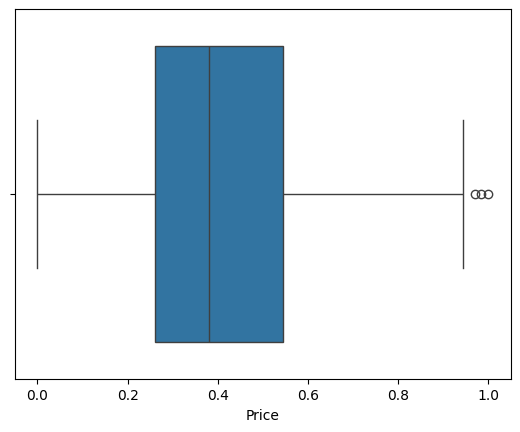

In [102]:
print(df.head())
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Price'])
plt.show()

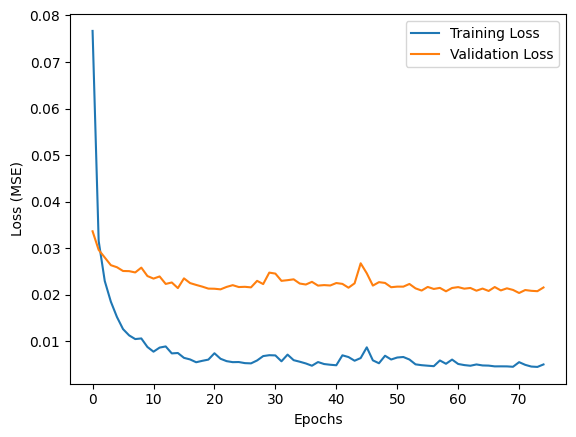

In [103]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

XGBoost Model

In [106]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Price'])
y = df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate its performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Tuned XGBoost Model - Mean Squared Error: {mse:.2f}")
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV]